Can I get boto3 to work?

In [3]:
import boto3
from botocore import UNSIGNED
from botocore.client import Config
import io
import numpy as np
from six.moves.urllib.request import urlopen
import soundfile as sf

## List the contents of a monthly directory

In [4]:
s3 = boto3.client('s3',
    aws_access_key_id='',
    aws_secret_access_key='', 
    config=Config(signature_version=UNSIGNED))

In [5]:
bucket = 'pacific-sound-256khz-2018'

for i, obj in enumerate(s3.list_objects_v2(Bucket=bucket)['Contents']):
  print(obj['Key'])
  if i > 20:
      break


01/MARS_20180101_000406.wav
01/MARS_20180101_001406.wav
01/MARS_20180101_002406.wav
01/MARS_20180101_003406.wav
01/MARS_20180101_004406.wav
01/MARS_20180101_005406.wav
01/MARS_20180101_010406.wav
01/MARS_20180101_011406.wav
01/MARS_20180101_012406.wav
01/MARS_20180101_013406.wav
01/MARS_20180101_014406.wav
01/MARS_20180101_015406.wav
01/MARS_20180101_020406.wav
01/MARS_20180101_021406.wav
01/MARS_20180101_022406.wav
01/MARS_20180101_023406.wav
01/MARS_20180101_024406.wav
01/MARS_20180101_025406.wav
01/MARS_20180101_030406.wav
01/MARS_20180101_031406.wav
01/MARS_20180101_032406.wav
01/MARS_20180101_033406.wav


## Read data from a file

In [6]:
bucket = 'pacific-sound-256khz-2018'
filename = '01/MARS_20180101_092406.wav'
url = f'https://{bucket}.s3.amazonaws.com/{filename}'
print(f'Reading data from {url}')
x, sample_rate = sf.read(io.BytesIO(urlopen(url).read()),dtype='float32')


Reading data from https://pacific-sound-256khz-2018.s3.amazonaws.com/01/MARS_20180101_092406.wav


## Make a spectrogram

In [7]:
from scipy.signal import ShortTimeFFT
from scipy.signal.windows import gaussian

In [9]:
x1 = x[0:256000*60]
g_std = 8  # standard deviation for Gaussian window in samples
w = gaussian(128, std=g_std, sym=True)  # symmetric Gaussian window
SFT = ShortTimeFFT(w, hop=10, fs=sample_rate, mfft=512, scale_to='magnitude')
Sx = SFT.stft(x1)  # perform the STFT

In [16]:
len(x1)

15360000

Matplotlib is building the font cache; this may take a moment.


NameError: name 'N' is not defined

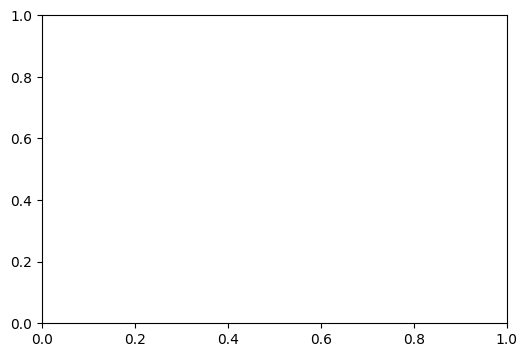

In [ ]:
import matplotlib.pyplot as plt
N = len(x1)
t_x = np.arange(N) / sample_rate
fig1, ax1 = plt.subplots(figsize=(6., 4.))  # enlarge plot a bit
t_lo, t_hi = SFT.extent(N)[:2]  # time range of plot
ax1.set_title(rf"STFT ({SFT.m_num*SFT.T:g}$\,s$ Gaussian window, " +
              rf"$\sigma_t={g_std*SFT.T}\,$s)")
ax1.set(xlabel=f"Time $t$ in seconds ({SFT.p_num(N)} slices, " +
               rf"$\Delta t = {SFT.delta_t:g}\,$s)",
        ylabel=f"Freq. $f$ in Hz ({SFT.f_pts} bins, " +
               rf"$\Delta f = {SFT.delta_f:g}\,$Hz)",
        xlim=(t_lo, t_hi))

im1 = ax1.imshow(abs(Sx), origin='lower', aspect='auto',
                 extent=SFT.extent(N), cmap='viridis')
ax1.plot(t_x, f_i, 'r--', alpha=.5, label='$f_i(t)$')
fig1.colorbar(im1, label="Magnitude $|S_x(t, f)|$")